In [138]:
import beauty
import csv
import pandas
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.style.use('ggplot')
%matplotlib inline
beauty.set_tex(False)
import time
from datetime import datetime
import numpy as np

In [139]:
results = pandas.DataFrame.from_csv('DATA/part1_results/flattened.csv')

In [140]:
raw = pandas.DataFrame.from_csv('DATA/part1_results/full_report.csv')
len(raw)
raw.columns

Index([u'_created_at', u'_id', u'_started_at', u'_tainted', u'_channel',
       u'_trust', u'_worker_id', u'_country', u'_region', u'_city', u'_ip',
       u'fair1', u'fair2', u'fair3', u'fair4', u'fair5', u'fair6', u'fair7',
       u'fair8', u'have_you_read_any_of_the_stories_above_before_this_study',
       u'if_so_which_ones', u'if_the_election_were_tomorrow_i_would_vote_for',
       u'leave_any_comments_below', u'trust1', u'trust2', u'trust3', u'trust4',
       u'trust5', u'trust6', u'trust7', u'trust8', u'what_is_your_age',
       u'what_is_your_gender', u'what_is_your_political_party_affiliation',
       u'candidate1', u'candidate2', u'candidate3', u'candidate4',
       u'candidate5', u'candidate6', u'candidate7', u'candidate8', u'false',
       u'flesch1', u'flesch2', u'flesch3', u'flesch4', u'flesch5', u'flesch6',
       u'flesch7', u'flesch8', u'is_complex1', u'is_complex2', u'is_complex3',
       u'is_complex4', u'is_complex5', u'is_complex6', u'is_complex7',
       u'is_comp

In [141]:
raw['t0'] = raw._started_at.apply(lambda row: datetime.strptime(row, "%m/%d/%Y %H:%M:%S") )
raw['t1'] = raw._created_at.apply(lambda row: datetime.strptime(row, "%m/%d/%Y %H:%M:%S") )

In [142]:
raw['time_spent'] = raw.t1 - raw.t0

In [143]:
print type(raw.time_spent.iloc[0])

print 'minutes', raw.time_spent.iloc[0].seconds % 3600 // 60
print 'seconds', raw.time_spent.iloc[0].seconds%60
raw.time_spent.

<class 'pandas.tslib.Timedelta'>
minutes 1
seconds 32


In [144]:
raw['min_spent'] = raw.time_spent.apply(lambda x: (x/ np.timedelta64(1, 's') ) % 3600 // 60)
raw['sec_spent'] = raw.time_spent.apply(lambda x: (x/ np.timedelta64(1, 's') ) %60)
raw['total_time'] = raw.time_spent.apply(lambda x: (x/np.timedelta64(1,'m')))

#raw['min_spent'] = raw.time_spent.apply(lambda x: [(x/ np.timedelta64(1, 's') ) % 3600 // 60, (x/ np.timedelta64(1, 's') ) %60])
#raw['min_spent'] = raw.time_spent.apply(lambda row: (row.seconds % 3600) // 60)
#raw['sec_spent'] = raw.time_spent.apply(lambda row: (row.seconds % 60))

#raw.time_spent.mean()
#raw.time_spent = raw.time_spent.astype("datetime64")

In [149]:
raw.time_spent.mean()

Timedelta('0 days 00:09:15.375000')

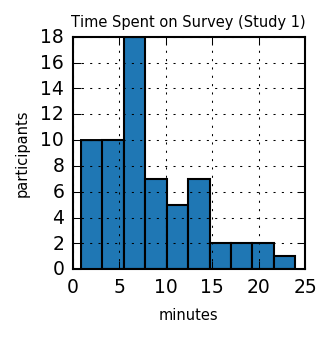

In [135]:
raw.total_time.hist(bins=10)
plt.title('Time Spent on Survey (Study 1)', fontsize=7)
plt.xlabel('minutes', fontsize=7) 
plt.ylabel('participants', fontsize=7)
plt.savefig('FIGS/time_spent.png')
#raw.min_spent
#raw.sec_spent
#raw.total_time

## Demographics

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


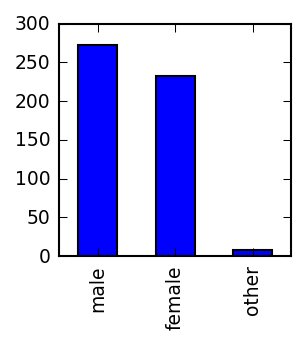

In [6]:
results.gender.value_counts().plot(kind='bar')

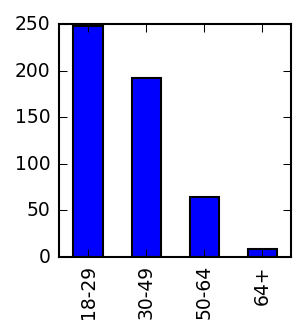

In [8]:
results.age.value_counts().plot(kind='bar')

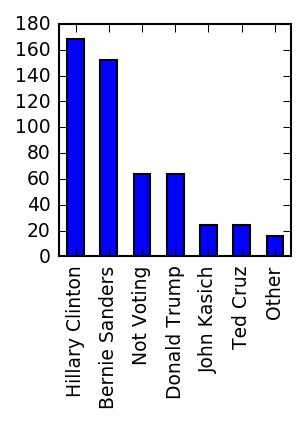

In [9]:
results.voting_for.value_counts().plot(kind='bar')

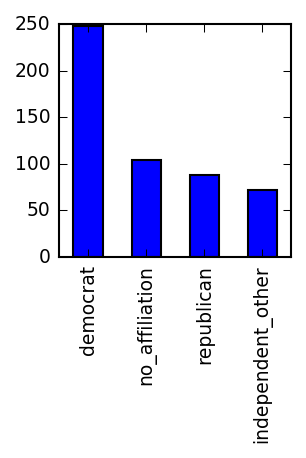

In [10]:
results.party.value_counts().plot(kind='bar')

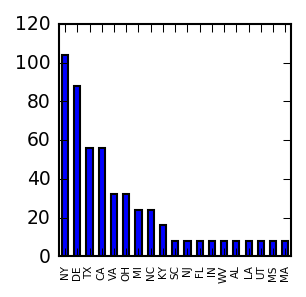

In [14]:
results.state.value_counts().plot(kind='bar')
plt.xticks(fontsize=5)
plt.show()